# Description of Database

The dataset contains of 55,500 rows and 15 columns, with information on patients,their medical conditions, billing details,and test results.


This dataset has been importd from kaggle

This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

# Importing libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [36]:
# loading the dataset
df = pd.read_csv("healthcare_dataset.csv")

In [37]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [14]:
# checking for null values
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

There are no null values in the dataset.
Let us drop out some irrevelant columns


In [38]:
df.drop(columns=['Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Hospital'], inplace=True)


In [39]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,205,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,Blue Cross,2650.714952,417,Elective,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,Cigna,31457.797307,316,Elective,Aspirin,Normal
55497,38,Female,B+,Hypertension,UnitedHealthcare,27620.764717,347,Urgent,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,Medicare,32451.092358,321,Elective,Ibuprofen,Abnormal


LET US VISUALIZE SOME INFO

In [40]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [41]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [42]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [44]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

As we can see , there are a lot of categorical columns like blood type,medical condition etc.
Let us encode them 

As we can see , after categorisation it is showing 1 for male and 0 for female

# Data Visualization
Let us visualize the data on four major aspects of the dataset.

Let us visualize the data on the basis of Billing Amount,Admission type, Medical Condition

let us visualize the billing amount with the help of a histogram

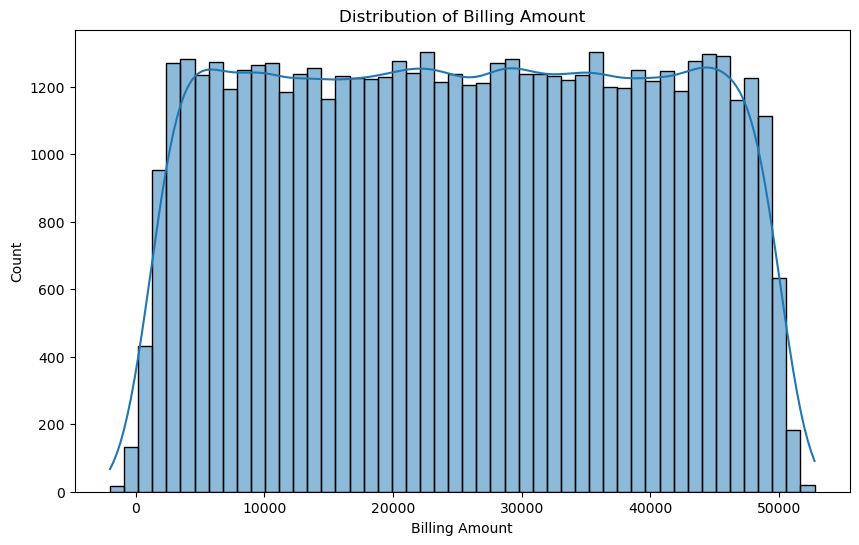

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], bins=50, kde=True)
plt.title("Distribution of Billing Amount")
plt.show()


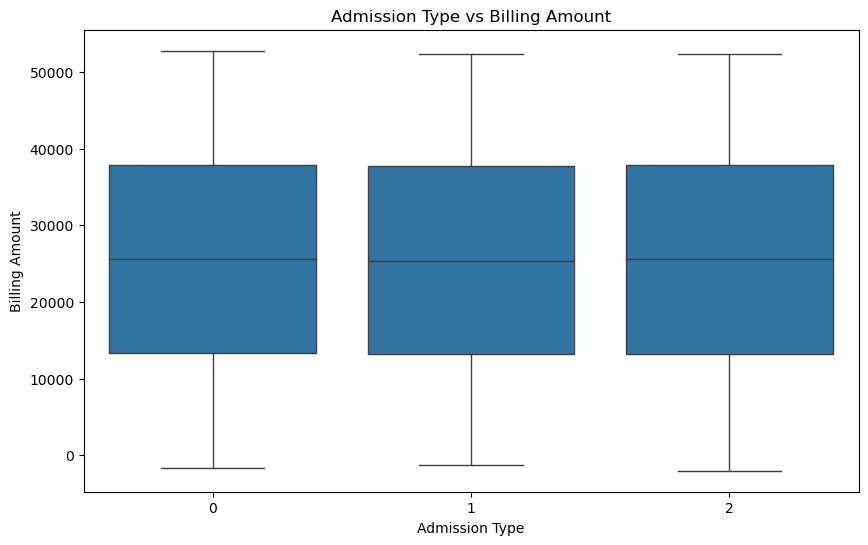

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Admission Type'], y=df['Billing Amount'])
plt.title("Admission Type vs Billing Amount")
plt.show()


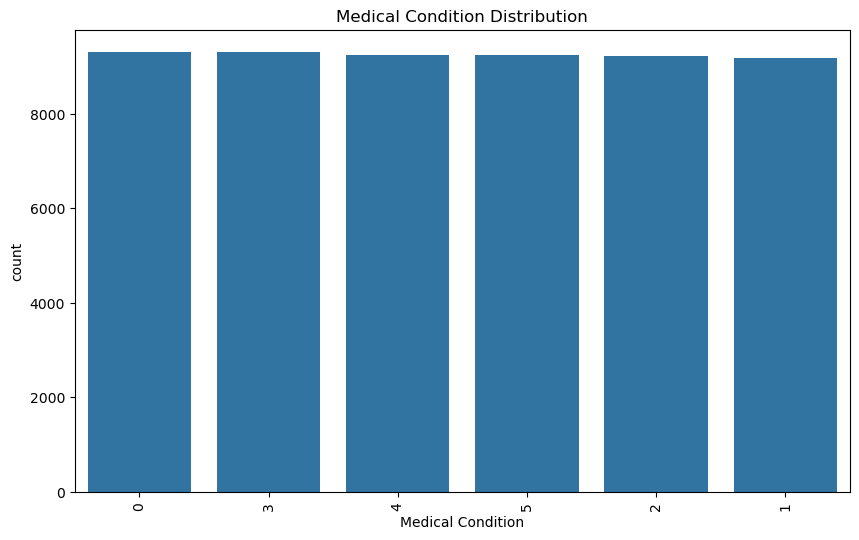

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Medical Condition Distribution")
plt.show()


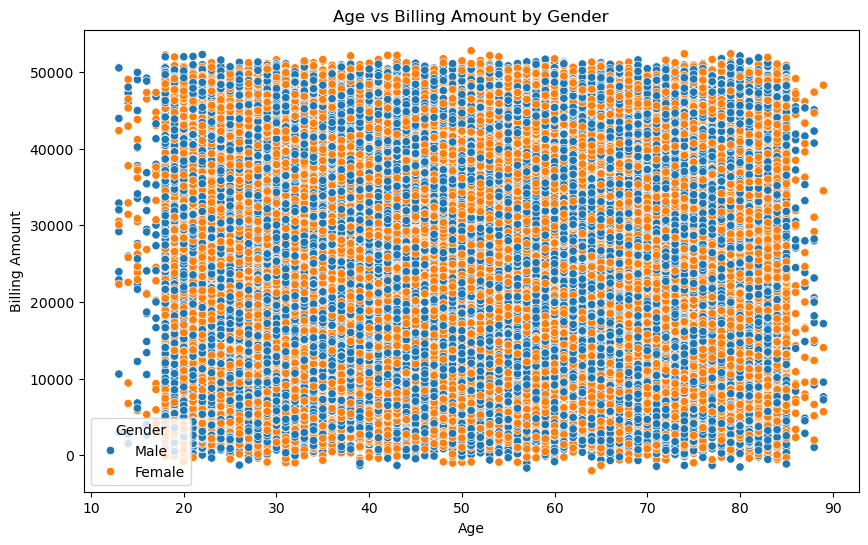

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Billing Amount', hue='Gender', data=df)
plt.title("Age vs Billing Amount by Gender")
plt.show()


In [49]:
label_encoders = {}
for col in ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [50]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
0,30,1,5,2,1,18856.281306,328,2,3,2
1,62,1,0,5,3,33643.327287,265,1,1,1
2,76,0,1,5,0,27955.096079,205,1,0,2
3,28,0,6,3,3,37909.782410,450,0,1,0
4,43,0,2,2,0,14238.317814,458,2,4,0
...,...,...,...,...,...,...,...,...,...,...
55495,42,0,6,1,1,2650.714952,417,0,4,0
55496,61,0,3,5,2,31457.797307,316,0,0,2
55497,38,0,4,4,4,27620.764717,347,2,1,0
55498,43,1,7,0,3,32451.092358,321,0,1,0


# Model Training

let us train 4 models (KNN, Random Forest, Logistic Regression, SVM)

In [25]:
X = df[['Age', 'Gender', 'Medical Condition', 'Billing Amount', 'Room Number', 'Admission Type']]
y = df['Test Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Standardizing helps many machine learning algorithms (like Logistic Regression, SVM, and Neural Networks) converge faster and perform better.
It prevents features with large values (e.g., income in thousands) from dominating those with small values (e.g., age in years).

training diffreent models:

In [28]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


In [31]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))



Random Forest Accuracy: 0.43
              precision    recall  f1-score   support

           0       0.44      0.45      0.44      3754
           1       0.41      0.41      0.41      3617
           2       0.44      0.43      0.44      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100

Logistic Regression Accuracy: 0.33
              precision    recall  f1-score   support

           0       0.34      0.33      0.33      3754
           1       0.32      0.28      0.30      3617
           2       0.34      0.39      0.37      3729

    accuracy                           0.33     11100
   macro avg       0.33      0.33      0.33     11100
weighted avg       0.33      0.33      0.33     11100

SVM Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.35      0.37      0.36      3754
           1       0.34      0.33      0.33   

In [32]:
best_model = max(accuracy_results, key=accuracy_results.get)
print("\nModel Accuracy Results:")
for model, acc in accuracy_results.items():
    print(f"{model}: {acc:.2f}")
print(f"\nBest Performing Model: {best_model} with Accuracy: {accuracy_results[best_model]:.2f}")


Model Accuracy Results:
Random Forest: 0.43
Logistic Regression: 0.33
SVM: 0.35
KNN: 0.37

Best Performing Model: Random Forest with Accuracy: 0.43
